In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("../data/MouseBrain_sce.h5ad")

In [4]:
anet.pp.normalize(adata)

In [5]:
print(adata.X[0:10, 0:10])

  (3, 0)	0.19426360329792525
  (6, 0)	0.09472177501057862
  (8, 0)	0.003300493166379891
  (5, 1)	0.0028526684625663932
  (9, 1)	0.00811486255005374
  (3, 5)	0.08475168045168134
  (4, 5)	0.8498425296261223
  (3, 7)	0.029056006129995482
  (4, 7)	1.7248040540782026
  (0, 8)	0.048739462328497005
  (2, 8)	0.05819561193116353
  (3, 8)	0.45674371974454114
  (4, 8)	0.4636560928195409
  (6, 8)	0.5425038398520935
  (1, 9)	1.70360174787663
  (8, 9)	0.28562589429689433


In [6]:
batch = adata.obs["batch"]
batch

index
CORTEX1_SMART_SEQ2.M2_EXPT2_1                                   Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_100                                 Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_101                                 Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_103                                 Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_104                                 Cortex1.Smart-seq2
                                                                      ...         
CORTEX2_SCI_RNA_SEQCCKVLANXX.052318-SCISEQ-P3_H9_GGTAGGTTAG    Cortex2.sci-RNA-seq
CORTEX2_SCI_RNA_SEQCCKVLANXX.052318-SCISEQ-P3_H9_GTCCTACTTG    Cortex2.sci-RNA-seq
CORTEX2_SCI_RNA_SEQCCKVLANXX.052318-SCISEQ-P3_H9_TGAGTCTGGC    Cortex2.sci-RNA-seq
CORTEX2_SCI_RNA_SEQCCKVLANXX.052318-SCISEQ-P3_H9_TTATAAGAAC    Cortex2.sci-RNA-seq
CORTEX2_SCI_RNA_SEQCCKVLANXX.052318-SCISEQ-P3_H9_TTCCAACCGC    Cortex2.sci-RNA-seq
Name: batch, Length: 11518, dtype: category
Categories (8, object): ['Cortex1.10x

In [7]:
anet.pp.reduce_and_batch_correct_adata_Harmony(adata, "batch")

Computing reduced ACTION kernel (sparse):
	Performing SVD on original matrix: IRLB (sparse) -- A: 22229 x 11518


2022-09-21 08:34:28,673 - harmonypy - INFO - Iteration 1 of 10
2022-09-21 08:34:31,215 - harmonypy - INFO - Iteration 2 of 10
2022-09-21 08:34:33,730 - harmonypy - INFO - Iteration 3 of 10
2022-09-21 08:34:36,258 - harmonypy - INFO - Iteration 4 of 10
2022-09-21 08:34:38,946 - harmonypy - INFO - Iteration 5 of 10
2022-09-21 08:34:41,740 - harmonypy - INFO - Iteration 6 of 10
2022-09-21 08:34:44,264 - harmonypy - INFO - Converged after 6 iterations


In [8]:
adata

AnnData object with n_obs × n_vars = 11518 × 22229
    obs: 'NAME', 'nGene', 'nUMI', 'percent.mito', 'Cluster', 'CellType', 'Experiment', 'Method', 'batch', 'assigned_archetype', 'node_centrality'
    var: 'Symbol', 'Ensemble_Gene_ID'
    uns: 'metadata', 'obsm_annot', 'varm_annot', 'ACTION'
    obsm: 'ACTION', 'ACTION_B', 'Harmony'
    varm: 'ACTION_V', 'ACTION_A'

In [9]:
print(adata.obsm["ACTION"][0:5, 0:10].T)

[[ 3.22184116  1.48700361  3.15988268  2.72617329  2.66421481]
 [ 3.81315213  0.56912718 -7.22791524 -8.99220951  4.21154116]
 [-3.18417682  1.59208841  0.2041139  -0.36740502 -3.26582238]
 [-4.3833672  -4.6158185  -8.73352708 -8.43466114 -4.15091591]
 [ 5.04551092  1.69173013  5.22358778  4.12544717  3.85833188]
 [ 0.50235082 -0.20685034 -2.18670356 -2.62995428 -0.02955005]
 [ 2.02324899  1.36634997 -4.02022202 -0.07882788  2.7589759 ]
 [-4.94481405 -0.97892258 -5.1205181  -2.91166715 -5.1205181 ]
 [-0.73868314 -0.59571221  5.00398255 -0.71485465 -0.95313953]
 [ 7.23098202  4.06352016  5.50138114  6.16821521  5.12628697]]


In [10]:
print(adata.obsm["Harmony"][0:5, 0:10].T)

[[ 1.34563558 -1.1327749   1.43779807  1.27150822  0.78801549]
 [ 4.84110208  1.14571658 -3.77472289 -6.76848078  5.23949138]
 [-1.05636049  2.34037568  1.5546284   0.4460536  -1.13800726]
 [-1.41594199 -2.02936875 -4.32318815 -4.07061114 -1.18349927]
 [ 2.64926911  0.39646516  2.81971422  2.0050882   1.46209437]
 [-0.12226332 -0.50950721 -2.20091863 -2.51079931 -0.65416594]
 [ 1.43933901  0.82529736 -4.10182351 -0.92777679  2.17507829]
 [-3.00262958  0.49970385 -2.92993333 -1.28002749 -3.17832008]
 [-0.04211614 -0.45805802  4.31544062 -0.29591601 -0.2565718 ]
 [ 2.97857374  1.02828649  1.6782636   2.20511371  0.87386123]]


In [12]:
anet.run_ACTIONet(adata, reduction_key="Harmony")

Running ACTION (10 threads):
	Iterating from k = 2 ... 30: 29/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 6
	Unreliable archetypes: 17
	Trivial archetypes: 6
Unifying 436 archetypes (10 threads):
# unified archetypes: 22
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... done
Laying-out input network: method = umap, a = 0.115, b = 1.929 (epochs = 100, threads=10)
Computing 2D layout ... done
Computing 3D layout ... done
Computing de novo node colors ... done
Computing feature specificity ... done
Building adaptive network (density = 0.50)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... 

In [13]:
adata

AnnData object with n_obs × n_vars = 11518 × 22229
    obs: 'NAME', 'nGene', 'nUMI', 'percent.mito', 'Cluster', 'CellType', 'Experiment', 'Method', 'batch', 'assigned_archetype', 'node_centrality'
    var: 'Symbol', 'Ensemble_Gene_ID'
    uns: 'metadata', 'obsm_annot', 'varm_annot', 'ACTION'
    obsm: 'ACTION', 'ACTION_B', 'Harmony', 'Harmony_normalized', 'C_stacked', 'H_stacked', 'C_unified', 'H_unified', 'archetype_footprint', 'ACTIONred', 'ACTIONet2D', 'ACTIONet3D', 'denovo_color'
    varm: 'ACTION_V', 'ACTION_A', 'unified_feature_profile', 'unified_feature_specificity'
    obsp: 'ACTIONet'

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

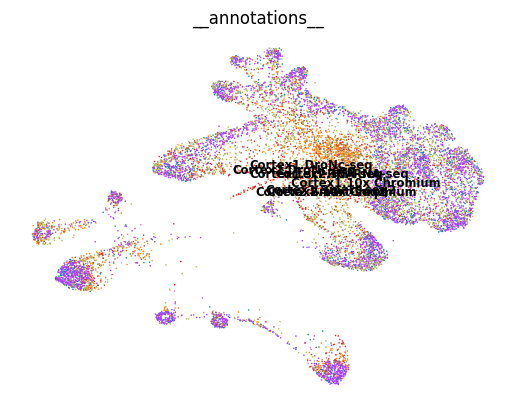

In [15]:
anet.pl.plot_ACTIONet(adata, "batch")

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

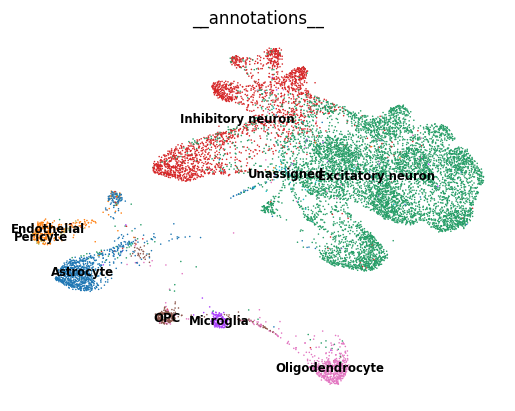

In [16]:
anet.pl.plot_ACTIONet(adata, "CellType")

In [17]:
adata.write_h5ad("../data/MouseBrain_ACTIONet_batch_corrected.h5ad")